# Tweets_fng Analysis

Met deze notebook wordt er geprobeerd om inzicht te krijgen over de datasert 'tweets_fng.csv'.

### Import libraries

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

### Load Data

In [56]:
data = pd.read_csv('../previous_data/combined/tweets_fng.csv')

data.head(5)


,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,...,user_entities_url,user_entities_description,self_thread,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,conversation_control,user_is_lifeline_institution,real_fake_grade
0,0,Sun Sep 13 23:03:09 +0000 2020,1305280887446151168,1305280887446151168,Our daily update is published. States reported...,False,"[0, 163]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1305280854726340608, 'id_str...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,Tue May 05 16:30:02 +0000 2020,1257709147539341312,1257709147539341312,President Trump Asked What He Would Do If He W...,False,"[0, 125]","{'hashtags': [{'text': 'donaldtrump', 'indices...",NaN,"<a href=""http://www.TheSpoof.com"" rel=""nofollo...",...,"{'urls': [{'url': 'http://t.co/WIDQSQyOyJ', 'e...",{'urls': []},NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2,2,Sat Jun 20 22:47:00 +0000 2020,1274473854849609728,1274473854849609728,States reported 630 deaths. We are still seein...,False,"[0, 245]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1274473845252997120, 'id_str...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1274465915438956544, 'id_str': '1274465...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,Sun Sep 20 02:02:00 +0000 2020,1307500226740203526,1307500226740203526,Low #vitaminD was an independent predictor of ...,False,"[0, 112]","{'hashtags': [{'text': 'vitaminD', 'indices': ...","{'media': [{'id': 1307500225330925570, 'id_str...","<a href=""https://prod2.sprinklr.com"" rel=""nofo...",...,"{'urls': [{'url': 'http://t.co/oCTatZ8LWl', 'e...",{'urls': []},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,Sun Apr 05 21:47:41 +0000 2020,1246917450924351489,1246917450924351489,A common question: why are the cumulative outc...,False,"[0, 277]","{'hashtags': [{'text': 's', 'indices': [274, 2...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1246907915254013953, 'id_str': '1246907...",NaN,NaN,NaN,NaN,NaN,NaN,1.0


**Insights**
- Er lijken veel objecten in de dataset te zijn
- Aantal kolommen bevatten veel NaN waardes
- id en id_str lijken dubbelop

In [57]:
data.shape

(7909, 98)

In [58]:
data.dtypes

Unnamed: 0                        int64
created_at                       object
id                                int64
id_str                            int64
full_text                        object
                                 ...   
quoted_status_permalink          object
quoted_status                    object
conversation_control             object
user_is_lifeline_institution     object
real_fake_grade                 float64
Length: 98, dtype: object

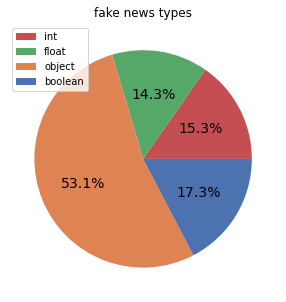

In [59]:
int_size = len(data.select_dtypes(['int']).columns.to_list())
float_size = len(data.select_dtypes(['float']).columns.to_list())
object_size = len(data.select_dtypes(['object']).columns.to_list())
boolean_size = len(data.select_dtypes(['boolean']).columns.to_list())

#define Seaborn color palette to use
colors = sns.color_palette('deep')[3::-1]

plt.figure(figsize=(5,5))
plt.pie([int_size, float_size, object_size, boolean_size], colors=colors, autopct='%.1F%%', textprops = {'fontsize':14})
plt.legend(labels=['int','float', 'object', 'boolean'])
plt.title('fake news types')
plt.show()


**Insights**
- de dataset bevat 98 kolommemn
- meer dan de helft daarvan zijn van het type object.

In [60]:
real = data[data['real_fake_grade'] >= 0.5]['real_fake_grade'].count()
real

4643

In [61]:
fake = data[data['real_fake_grade'] <= -0.5]['real_fake_grade'].count()
fake

2356

In [62]:
neutral = data.shape[0] - real - fake
neutral

910

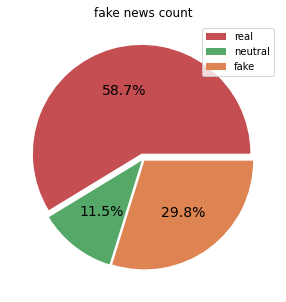

In [63]:
#define Seaborn color palette to use
colors = sns.color_palette('deep')[3 :  : -1]

explode = [0.05,0.02,0.02]

plt.figure(figsize=(5,5))
plt.pie([real, neutral, fake], colors=colors, autopct='%.1F%%', textprops = {'fontsize':14}, explode = explode)
plt.legend(labels=['real', 'neutral', 'fake'])
plt.title('fake news count')
plt.show()

**insights**
- Dataset is niet helemaal in balans. er is veel meer echt nieuws dan nepnieuws.

---

##### Integer columns

In [64]:
int_columns = data.select_dtypes(['int'])
int_columns

,Unnamed: 0,id,id_str,retweet_count,favorite_count,user_id,user_id_str,user_followers_count,user_fast_followers_count,user_normal_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,user_media_count
0,0,1305280887446151168,1305280887446151168,171,528,1236557193752657926,1236557193752657926,468030,0,468030,13,6034,85,2594,1364
1,1,1257709147539341312,1257709147539341312,0,0,237686935,237686935,803,0,803,97,118,1,57502,3
2,2,1274473854849609728,1274473854849609728,71,199,1236557193752657926,1236557193752657926,468030,0,468030,13,6034,85,2594,1364
3,3,1307500226740203526,1307500226740203526,40,71,16892009,16892009,215969,0,215969,39457,2989,2206,49892,16563
4,4,1246917450924351489,1246917450924351489,0,29,1236557193752657926,1236557193752657926,468030,0,468030,13,6034,85,2594,1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904,3731,1280654762950774785,1280654762950774785,0,0,300683121,300683121,95,0,95,205,5,4905,6143,3291
7905,3732,1280669090835828738,1280669090835828738,0,0,2181396651,2181396651,8,0,8,44,0,135,31,9
7906,3733,1280675380014309376,1280675380014309376,0,15,329983843,329983843,528,0,528,459,1,21615,16680,344
7907,3734,1280676605396836352,1280676605396836352,0,0,773400001863118848,773400001863118848,488,0,488,1425,5,1928,1699,52


In [65]:
int_columns.isna().sum()

Unnamed: 0                     0
id                             0
id_str                         0
retweet_count                  0
favorite_count                 0
user_id                        0
user_id_str                    0
user_followers_count           0
user_fast_followers_count      0
user_normal_followers_count    0
user_friends_count             0
user_listed_count              0
user_favourites_count          0
user_statuses_count            0
user_media_count               0
dtype: int64

**Insights**
- Er zijn geen null of nan waardes

In [66]:
int_columns.nunique()

Unnamed: 0                     4173
id                             7821
id_str                         7821
retweet_count                   398
favorite_count                  574
user_id                        3941
user_id_str                    3941
user_followers_count           2624
user_fast_followers_count         1
user_normal_followers_count    2624
user_friends_count             2135
user_listed_count               595
user_favourites_count          3311
user_statuses_count            3753
user_media_count               2317
dtype: int64

**insights**
- user_id en user_id_str zijn hetzelfde
- user_id en id_str zijn alleen bedoeld voor idenficicatie -> mogen beide weg
- user_fast_followers_count heeft maar 1 unieke waarde -> mag weg

##### Float columns

In [67]:
float_columns = data.select_dtypes(['float'])
float_columns

,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,user_utc_offset,user_time_zone,user_lang,user_following,user_follow_request_sent,user_notifications,quoted_status_id,quoted_status_id_str,real_fake_grade
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2,1.274473e+18,1.274473e+18,1.236557e+18,1.236557e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1.246916e+18,1.246916e+18,1.236557e+18,1.236557e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
7906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [68]:
float_columns.isna().sum()

in_reply_to_status_id        6501
in_reply_to_status_id_str    6501
in_reply_to_user_id          6452
in_reply_to_user_id_str      6452
contributors                 7909
user_utc_offset              7909
user_time_zone               7909
user_lang                    7909
user_following               7909
user_follow_request_sent     7909
user_notifications           7909
quoted_status_id             7095
quoted_status_id_str         7095
real_fake_grade                 2
dtype: int64

**Insights**
- De label heeft 2 lege rijen. Deze kunnen weg.
- Er zijn heel wat kolommen zoals user_lang die helemaal leeg zijn. Deze kunnen ook weg.

In [69]:
float_columns.nunique()

in_reply_to_status_id        1325
in_reply_to_status_id_str    1325
in_reply_to_user_id           544
in_reply_to_user_id_str       544
contributors                    0
user_utc_offset                 0
user_time_zone                  0
user_lang                       0
user_following                  0
user_follow_request_sent        0
user_notifications              0
quoted_status_id              764
quoted_status_id_str          764
real_fake_grade                 8
dtype: int64

In [70]:
float_columns['real_fake_grade'].value_counts()

 1.00    4215
-1.00    1811
 0.00     875
-0.50     545
 0.50     411
-0.25      21
 0.75      17
 0.25      12
Name: real_fake_grade, dtype: int64

**Insights**
- er zijn een aantal kolommen zonder enige waardes. Deze kunnen eruit.
- in_reply_to_status_id_str en in_reply to_status_id zijn hetzelfde
- in_reply_too_user_id_str en in_reply_to_user_id zijn hetzelfde
- quoted_status_id_str en quoted_status_id zijn hetzelfde
- real_fake_grades heeft 8 verschillende waardes

##### Boolean columns

In [71]:
boolean_columns = data.select_dtypes(['boolean'])
boolean_columns

,truncated,is_quote_status,favorited,retweeted,user_protected,user_geo_enabled,user_verified,user_contributors_enabled,user_is_translator,user_is_translation_enabled,user_profile_background_tile,user_profile_use_background_image,user_has_extended_profile,user_default_profile,user_default_profile_image,user_has_custom_timelines,user_require_some_consent
0,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7905,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False
7906,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False
7907,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False


In [72]:
boolean_columns.isna().sum()

truncated                            0
is_quote_status                      0
favorited                            0
retweeted                            0
user_protected                       0
user_geo_enabled                     0
user_verified                        0
user_contributors_enabled            0
user_is_translator                   0
user_is_translation_enabled          0
user_profile_background_tile         0
user_profile_use_background_image    0
user_has_extended_profile            0
user_default_profile                 0
user_default_profile_image           0
user_has_custom_timelines            0
user_require_some_consent            0
dtype: int64

**Insights**
- Er zijn geen NaN waardes of lege cellen

In [73]:
boolean_columns.nunique()

truncated                            1
is_quote_status                      2
favorited                            1
retweeted                            1
user_protected                       1
user_geo_enabled                     2
user_verified                        2
user_contributors_enabled            1
user_is_translator                   1
user_is_translation_enabled          2
user_profile_background_tile         2
user_profile_use_background_image    2
user_has_extended_profile            2
user_default_profile                 2
user_default_profile_image           2
user_has_custom_timelines            2
user_require_some_consent            2
dtype: int64

**Insights**
- Er zijn kolommen met 1 unieke waarde -> mogen weg

##### Object columns

In [74]:
object_columns = data.select_dtypes(['object'])
object_columns

,created_at,full_text,display_text_range,entities,extended_entities,source,in_reply_to_screen_name,user,geo,coordinates,...,entities_urls,entities_media,extended_entities_media,user_entities_url,user_entities_description,self_thread,quoted_status_permalink,quoted_status,conversation_control,user_is_lifeline_institution
0,Sun Sep 13 23:03:09 +0000 2020,Our daily update is published. States reported...,"[0, 163]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1305280854726340608, 'id_str...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,"{'id': 1236557193752657926, 'id_str': '1236557...",NaN,NaN,...,[],"[{'id': 1305280854726340608, 'id_str': '130528...","[{'id': 1305280854726340608, 'id_str': '130528...","{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},NaN,NaN,NaN,NaN,NaN
1,Tue May 05 16:30:02 +0000 2020,President Trump Asked What He Would Do If He W...,"[0, 125]","{'hashtags': [{'text': 'donaldtrump', 'indices...",NaN,"<a href=""http://www.TheSpoof.com"" rel=""nofollo...",NaN,"{'id': 237686935, 'id_str': '237686935', 'name...",NaN,NaN,...,"[{'url': 'https://t.co/3MEWhusRZI', 'expanded_...",NaN,NaN,"{'urls': [{'url': 'http://t.co/WIDQSQyOyJ', 'e...",{'urls': []},NaN,NaN,NaN,NaN,NaN
2,Sat Jun 20 22:47:00 +0000 2020,States reported 630 deaths. We are still seein...,"[0, 245]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1274473845252997120, 'id_str...","<a href=""https://mobile.twitter.com"" rel=""nofo...",COVID19Tracking,"{'id': 1236557193752657926, 'id_str': '1236557...",NaN,NaN,...,[],"[{'id': 1274473845252997120, 'id_str': '127447...","[{'id': 1274473845252997120, 'id_str': '127447...","{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1274465915438956544, 'id_str': '1274465...",NaN,NaN,NaN,NaN
3,Sun Sep 20 02:02:00 +0000 2020,Low #vitaminD was an independent predictor of ...,"[0, 112]","{'hashtags': [{'text': 'vitaminD', 'indices': ...","{'media': [{'id': 1307500225330925570, 'id_str...","<a href=""https://prod2.sprinklr.com"" rel=""nofo...",NaN,"{'id': 16892009, 'id_str': '16892009', 'name':...",NaN,NaN,...,"[{'url': 'https://t.co/CGD6Kphn31', 'expanded_...","[{'id': 1307500225330925570, 'id_str': '130750...","[{'id': 1307500225330925570, 'id_str': '130750...","{'urls': [{'url': 'http://t.co/oCTatZ8LWl', 'e...",{'urls': []},NaN,NaN,NaN,NaN,NaN
4,Sun Apr 05 21:47:41 +0000 2020,A common question: why are the cumulative outc...,"[0, 277]","{'hashtags': [{'text': 's', 'indices': [274, 2...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",COVID19Tracking,"{'id': 1236557193752657926, 'id_str': '1236557...",NaN,NaN,...,[],NaN,NaN,"{'urls': [{'url': 'https://t.co/GyCwfsjf7G', '...",{'urls': []},"{'id': 1246907915254013953, 'id_str': '1246907...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904,Wed Jul 08 00:07:43 +0000 2020,Da fark is wrong with these people?!\r\n\r\nht...,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,"{'id': 300683121, 'id_str': '300683121', 'name...",NaN,NaN,...,"[{'url': 'https://t.co/DXmbSobsAQ', 'expanded_...",NaN,NaN,"{'urls': [{'url': 'https://t.co/yOhLUOD8ZY', '...",{'urls': []},NaN,NaN,NaN,NaN,NaN
7905,Wed Jul 08 01:04:39 +0000 2020,Doctor Finds Cure to COVID-19 (without Vaccine...,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"{'id': 2181396651, 'id_str': '2181396651', 'na...",NaN,NaN,...,"[{'url': 'https://t.co/60dQdolwtp', 'expanded_...",NaN,NaN,NaN,{'urls': []},NaN,NaN,NaN,NaN,NaN
7906,Wed Jul 08 01:29:39 +0000 2020,I can’t believe people legitimately think that...,"[0, 178]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,"{'id': 329983843, 'id_str': '329983843', 'name...",NaN,NaN,...,[],NaN,NaN,"{'urls': [{'url': 

In [75]:
object_columns.nunique()

created_at                                 7733
full_text                                  7820
display_text_range                          732
entities                                   6437
extended_entities                          2445
source                                      128
in_reply_to_screen_name                     544
user                                       4210
geo                                           9
coordinates                                   9
place                                       132
possibly_sensitive                            2
possibly_sensitive_appealable                 1
possibly_sensitive_editable                   1
lang                                         19
supplemental_language                         1
user_name                                  3906
user_screen_name                           3941
user_location                              1954
user_description                           3590
user_url                                

In [76]:
# Remove spaces to check wheter a cell is equal to an empty string
data.replace(r'^\s *$', np.nan, regex=True, inplace=True)

nans = object_columns.isna().sum()

cols = [i for i in nans.keys() if nans[i]/data.shape[0]*100 > 75]

data.drop(cols, axis=1, inplace=True)

cols

['in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'supplemental_language',
 'self_thread',
 'quoted_status_permalink',
 'quoted_status',
 'conversation_control',
 'user_is_lifeline_institution']

**Insights**
- er zijn een aantal kolommen met heel wat NaN waardes.